### Time Series Forecasting using LSTM and GRU
In this notebook will use LSTM & GRU for predicting the price of stocks of Google for the year 2017

## Importing the libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

## Helper Functions for Plotting Predictions and Calculating RMSE

In [25]:
def plot_pred(test, pred):
    plt.plot(test, color='red', label='Real GOOGLE Stock Price')
    plt.plot(pred, color='blue', label='Predicted GOOGLE Stock Price')
    plt.title('GOOLGE Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('GOOGLE Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,pred):
    rmse = math.sqrt(mean_squared_error(test, pred))
    print("The root mean squared error is {}.".format(rmse))

## Getting the data

In [26]:
df = pd.read_csv('D:\\Tuwaiq Academy\\Tuwaiq_Academy_T5_Week_5\\Week5LAB2\\Datasets\\GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


Slpitting dataset to train set (Before 2017) and test set (2017 and beyond)

In [27]:
df.index.unique()

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=3019, freq=None)

In [28]:
train = df[:'2016'].iloc[:,1:2].values
test = df['2017':].iloc[:,1:2].values

Visualizing the data

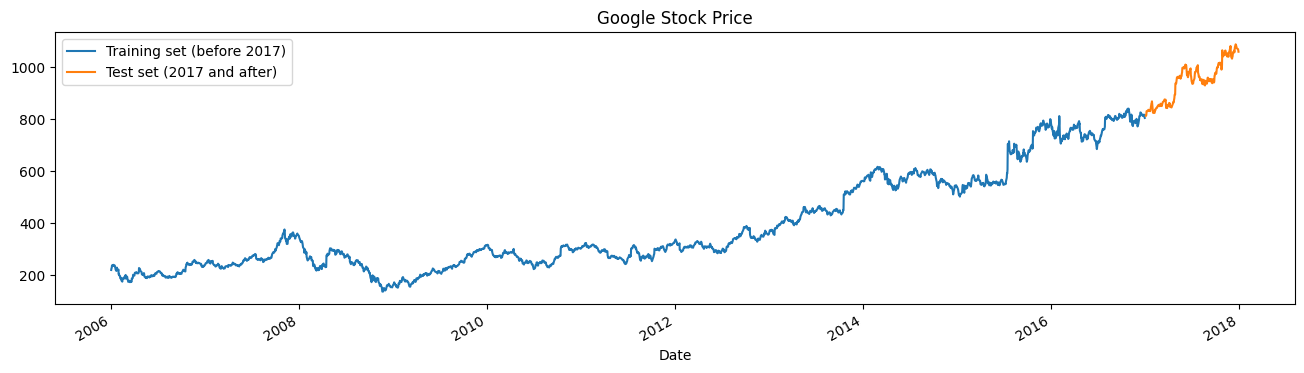

In [29]:
df['High'][:'2016'].plot(figsize=(16,4), legend=True)
df['High']['2017':].plot(figsize=(16,4), legend=True)
plt.legend(['Training set (before 2017)', 'Test set (2017 and after)'])
plt.title('Google Stock Price')
plt.show()

## Data Preprocessing

Scaling the training set

In [30]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)

Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output. So for each element of training set, we have 60 previous training set elements

In [31]:
X_train = []
y_train = []
for i in range(60,2000):
    X_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping X_train for efficient modelling

In [32]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## LSTM Model

In [33]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1),
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


61/61 ━━━━━━━━━━━━━━━━━━━━ 15s 104ms/step - loss: 0.0100
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 0.0012
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0013
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - loss: 9.4987e-04
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 9.2927e-04
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0010
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 9.2194e-04
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 8.4500e-04
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 7.2213e-04
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 7.0872e-04
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 6.2570e-04
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 6.7901e-04
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 5.8284e-04
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 5.9155e-04
Epoch 15/50
61/61 ━━━━━━━━━━━━━━


## Make preductuion with LSTM model

In [36]:
dataset_total = pd.concat((df["High"][:'2016'], df["High"]['2017':]), axis=0)
inputs = dataset_total[len(dataset_total)-len(test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [37]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step


Visualizing the results

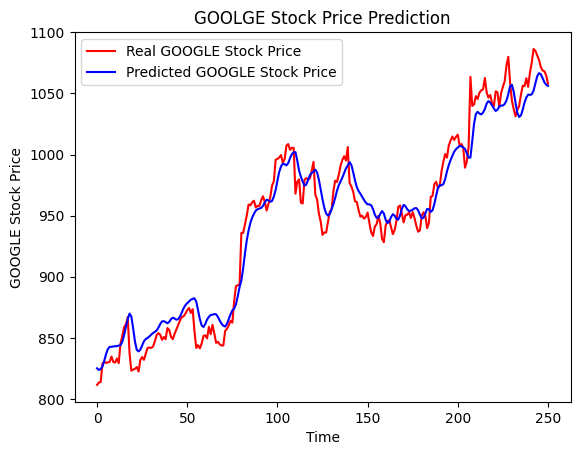

In [38]:
plot_pred(test, pred_price)

Evaluating LSMT Model

In [39]:
return_rmse(test, pred_price)

The root mean squared error is 15.059697414748895.


## GRU Model

In [41]:
RGRU = Sequential([
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'),
    Dropout(0.2),
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'),
    Dropout(0.2),
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'),
    Dropout(0.2),
    GRU(50, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])

RGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

RGRU.summary()

C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 60, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 60, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, 60, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,901 (210.55 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
RGRU.fit(X_train, y_train, epochs=50, batch_size=150)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 318ms/step - loss: 0.0304
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 288ms/step - loss: 0.0132
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 274ms/step - loss: 0.0104
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 273ms/step - loss: 0.0090
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 289ms/step - loss: 0.0080
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 315ms/step - loss: 0.0076
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 283ms/step - loss: 0.0064
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 295ms/step - loss: 0.0061
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 275ms/step - loss: 0.0055
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 289ms/step - loss: 0.0048
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step - loss: 0.0040
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 271ms/step - loss: 0.0032
Epoch 13/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 285ms/step - loss: 0.0024
Epoch 14/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step - loss: 0.0022
Epoch 15/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 252ms/step - l


## Make preductuion with GRU model

In [43]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = RGRU.predict(X_test)
GRU_predicted_stock_price = scaler.inverse_transform(GRU_predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step


Visualizing the Results

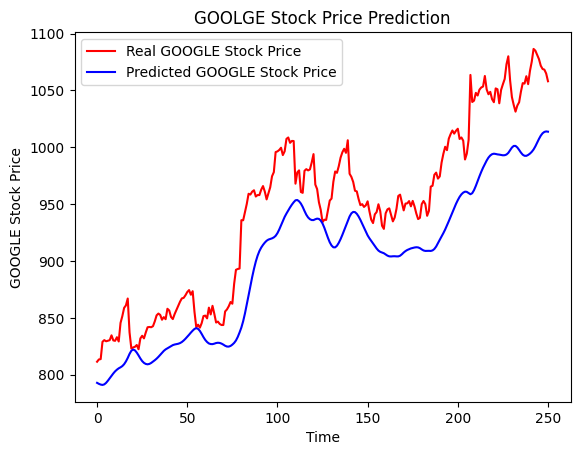

In [44]:
plot_pred(test, GRU_predicted_stock_price)

Evaluating GRU Model

In [45]:
return_rmse(test, GRU_predicted_stock_price)

The root mean squared error is 48.519582505313025.
